### BLOQUE 0: Importar librerías y cargar dataset

In [1]:
# Importar librerías principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Cargar dataset
file_path = "dataset_C2_Spotify_Youtube.csv"  
df = pd.read_csv(file_path)

# Ver primeras filas y dimensiones
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (20718, 28)


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


### BLOQUE 1: Seleccionar columnas de interés y limpiar índice redundante

In [2]:
# Eliminar columna innecesaria y quedarnos solo con las variables clave
df_clean = df.drop(columns=["Unnamed: 0"])
df_clean = df_clean[["Danceability", "Energy", "Speechiness", "Acousticness", "Liveness", "Valence"]]

### BLOQUE 2: Manejo de valores nulos

In [3]:
# Revisar cuántos nulos hay
print(df_clean.isnull().sum())

# Eliminar filas con nulos en nuestras variables de interés
df_clean = df_clean.dropna()

Danceability    2
Energy          2
Speechiness     2
Acousticness    2
Liveness        2
Valence         2
dtype: int64


### BLOQUE 3: Crear variable objetivo (binarizar Valence)

In [4]:
# Crear etiqueta binaria: Positivo si Valence >= 0.5
df_clean["Valence_label"] = df_clean["Valence"].apply(lambda x: "Positivo" if x >= 0.5 else "Negativo")

# Ver distribución de clases
print(df_clean["Valence_label"].value_counts())

Valence_label
Positivo    11380
Negativo     9336
Name: count, dtype: int64


### BLOQUE 4: Histogramas de variables predictoras

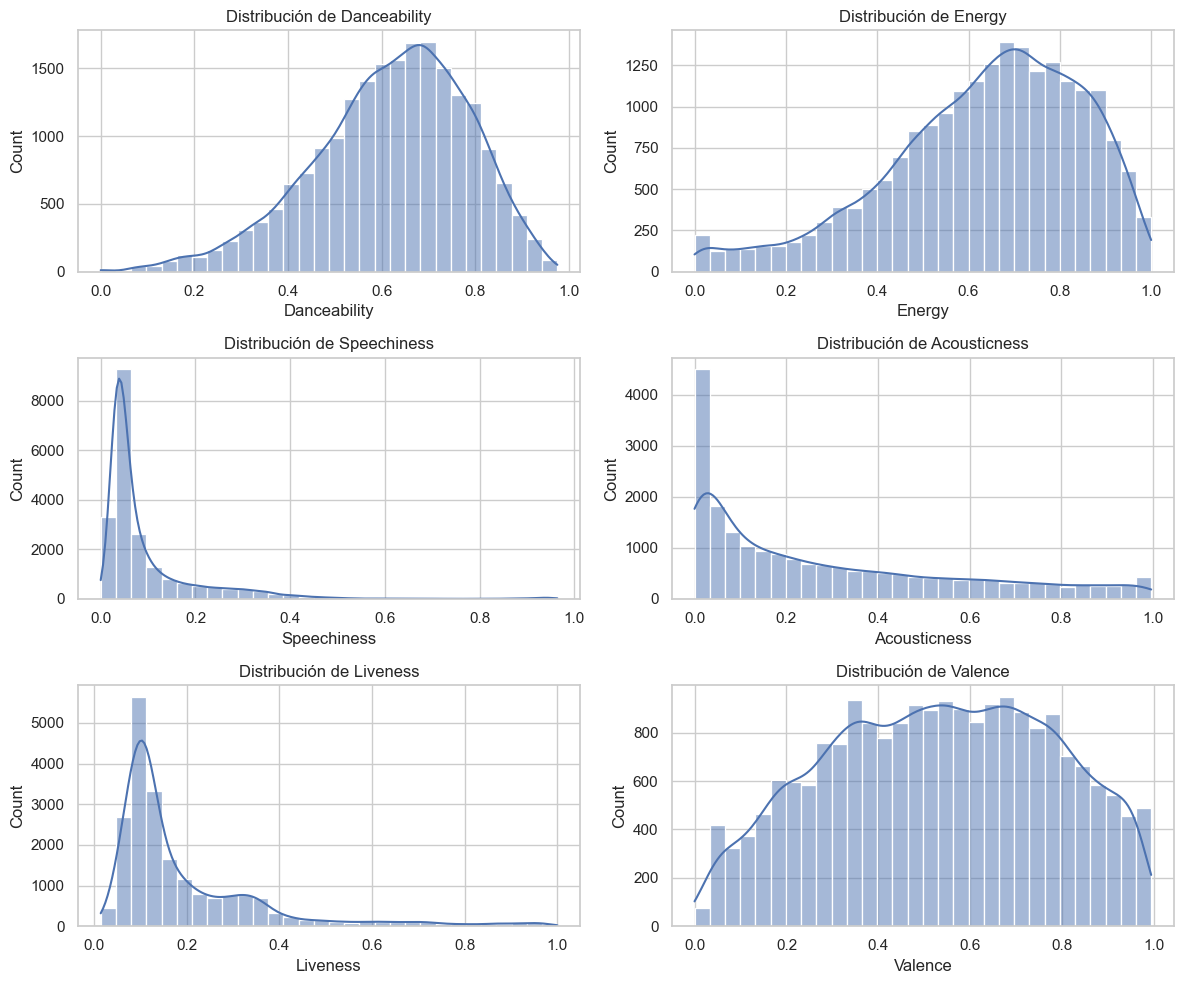

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(["Danceability", "Energy", "Speechiness", "Acousticness", "Liveness", "Valence"]):
    sns.histplot(df_clean[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

### BLOQUE 5: Boxplots para ver outliers

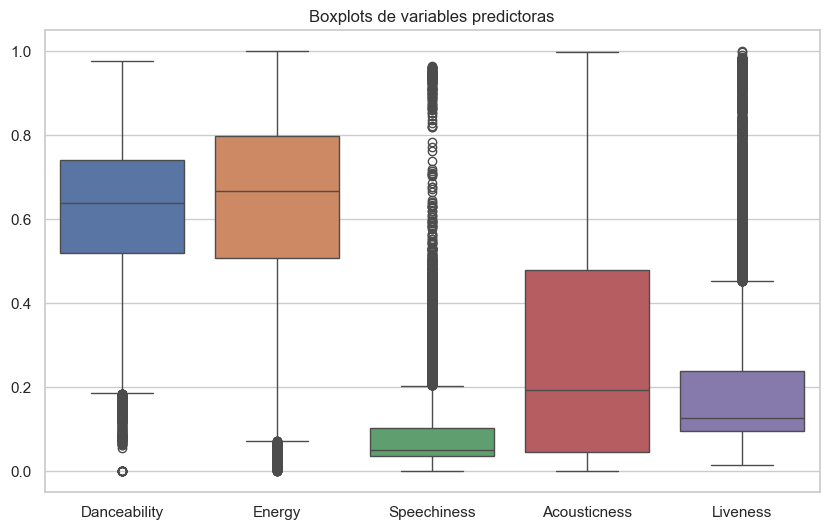

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[["Danceability", "Energy", "Speechiness", "Acousticness", "Liveness"]])
plt.title("Boxplots de variables predictoras")
plt.show()

### BLOQUE 6: Matriz de correlación

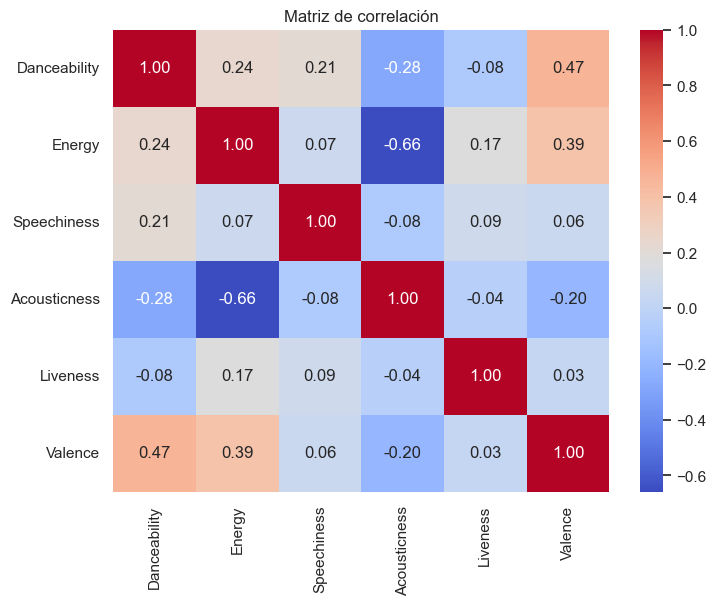

In [7]:
plt.figure(figsize=(8, 6))
corr = df_clean[["Danceability", "Energy", "Speechiness", "Acousticness", "Liveness", "Valence"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()